In [4]:
import data
import preprocessing
import exportation
import settings

import joblib

import matplotlib.pyplot as plt
import matplotlib as mplt
import seaborn as sns
import pandas as pd
import numpy as np


# *****************************************************************
# ------------------------ Program parameters ---------------------
# *****************************************************************

enseigne = 'Auchan'

# Exploration des données d'entrainement

In [5]:
df = data.data_extraction.BDD_Promo('BigQuery', enseigne)


Querying BigQuery for training data...
Querying and loading time = 184.10 s 
Request finished



In [6]:
#Data Cleaning
df_clean,id_cols = preprocessing.training_set_preprocessing.training_set_cleaning(df)

print('Dataframe shape :', df_clean.shape)

Cleaning Data...
Data cleansing done

Dataframe shape : (349730, 34)


In [8]:
if 'AUCHAN' in df_clean.Enseigne.unique():
      df_clean.drop(['CodeLot'], axis = 1)

In [9]:
df_clean.isna().sum()

Confirmation                       0
Annee                              0
SemaineDebut                       0
NomOpe                             0
DateDebutConso                     0
DateFinConso                       0
Enseigne                           0
DirectionRegionale              1815
ZoneCVR                         1815
SecteurCM                          0
NomMagasin                         0
Superficie                      8971
CodeMagasin                        0
CAMagasin                       1815
IndiceMagPromophile             1815
CodeSAPProduit                     0
EANProduit                         0
NomProduit                         0
UmbrellaBrand                      0
NBPotsParUC                        0
FlagInno                           0
DureeEnJoursDepuisLancement        0
TotalVentesMarqueUC             1871
IndiceMarquePromophile          1871
Mecanique                          0
EncodageMecaniquePromo          7179
PreviVolUCNonPondere               0
P

In [11]:
df_clean.head(2)

,Confirmation,Annee,SemaineDebut,NomOpe,DateDebutConso,DateFinConso,Enseigne,DirectionRegionale,ZoneCVR,SecteurCM,...,Mecanique,EncodageMecaniquePromo,PreviVolUCNonPondere,PreviUCRetouche,CodeLot,TauxDeDegradation,NBJours,NBCodesJoues,MaxVentesEANPasseeEnUC,VentesUC
0,Acceptée,2018-01-01,32,AOUT N° 3 Tract - 2018,2018-08-13,2018-08-21,AUCHAN,1000,1100,CM 1130 / PM,...,Lot virtuel 3 pour 2,10.0,9.608928e+07,17658.033491,1,33.0,7,14,128,73
1,Acceptée,2019-01-01,22,JUIN N° 2 Tract - 2019,2019-06-05,2019-06-11,AUCHAN,1000,1100,CM 1110 / PM 1111,...,Prix Choc / Spécial /autres,12.0,3.439000e+07,26747.490610,1,30.0,7,14,79,67


In [24]:
df_clean['annee'] = pd.DatetimeIndex(df_clean['DateDebutConso']).year
df_clean['mois'] = pd.DatetimeIndex(df_clean['DateDebutConso']).month
df_clean['semaine'] = pd.DatetimeIndex(df_clean['DateDebutConso']).week
df_clean['trimestre'] = pd.DatetimeIndex(df_clean['DateDebutConso']).quarter
df_clean['cos(semaine*2pi/52)'] = np.cos(pd.DatetimeIndex(df_clean['DateDebutConso']).week*2*np.pi/52)
df_clean['JourDeAnnee'] = pd.DatetimeIndex(df_clean['DateDebutConso']).dayofyear

df_clean.head(2)

,Confirmation,Annee,SemaineDebut,NomOpe,DateDebutConso,DateFinConso,Enseigne,DirectionRegionale,ZoneCVR,SecteurCM,...,NBJours,NBCodesJoues,MaxVentesEANPasseeEnUC,VentesUC,annee,mois,semaine,cos(semaine*2pi/52),trimestre,JourDeAnnee
0,Acceptée,2018-01-01,32,AOUT N° 3 Tract - 2018,2018-08-13,2018-08-21,AUCHAN,1000,1100,CM 1130 / PM,...,7,14,128,73,2018,8,33,-0.663123,3,225
1,Acceptée,2019-01-01,22,JUIN N° 2 Tract - 2019,2019-06-05,2019-06-11,AUCHAN,1000,1100,CM 1110 / PM 1111,...,7,14,79,67,2019,6,23,-0.935016,2,156


In [25]:
df_clean.describe(include = 'all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Confirmation,349730,1,Acceptée,349730,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annee,349730,4,2019-01-01,93537,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SemaineDebut,349730,NaN,NaN,NaN,24.9444,14.7381,1,12,23,38,52
NomOpe,349730,198,GRAND RDV 6,12499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DateDebutConso,349730,175,2017-11-03,12499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DateFinConso,349730,171,2017-11-09,12499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Enseigne,349730,1,AUCHAN,349730,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DirectionRegionale,347915,3,2000,152063,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZoneCVR,347915,22,2100,44998,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SecteurCM,349730,61,CM 2120 / PM 2121,14923,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Visualisation

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

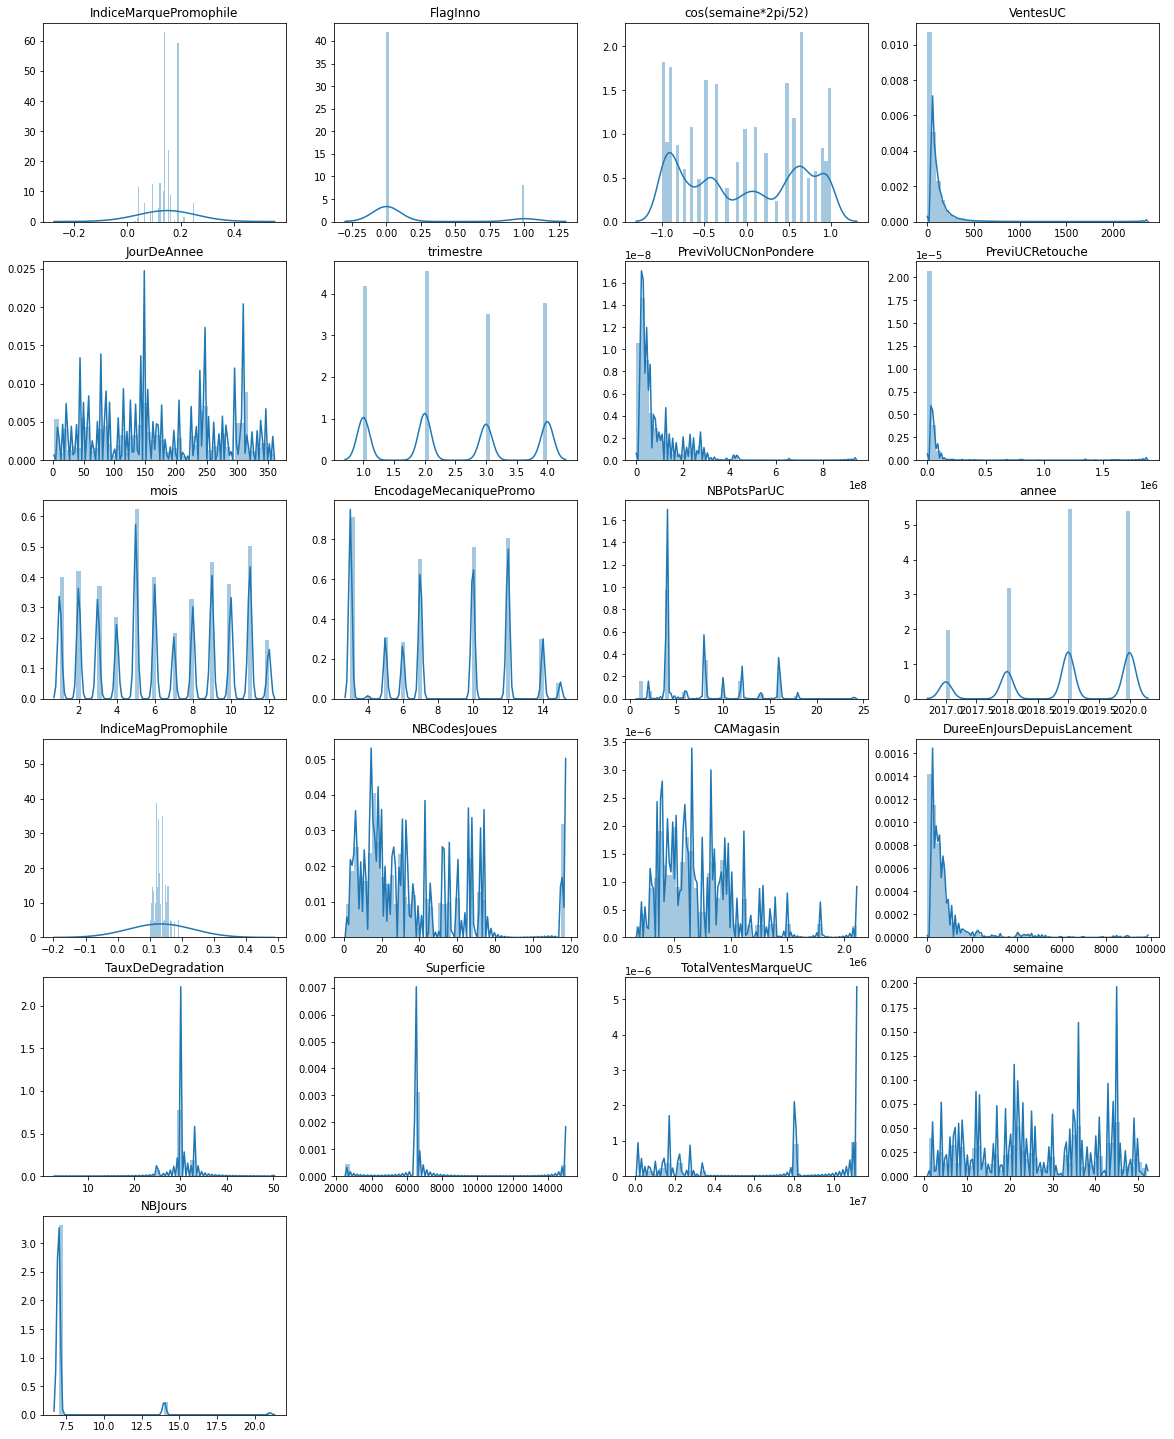

In [26]:
fig = plt.figure
fig(figsize =(20,30))
i=0

df_clean = df_clean.dropna()

for col in set(df_clean.columns) - set(id_cols):
    plt.subplot(7, 4, i + 1)
    plt.title(col)
    sns.distplot(df_clean[[col]] , kde_kws = {'bw':0.1})
    i+=1

plt.tight_layout

## Analyse de Correlation

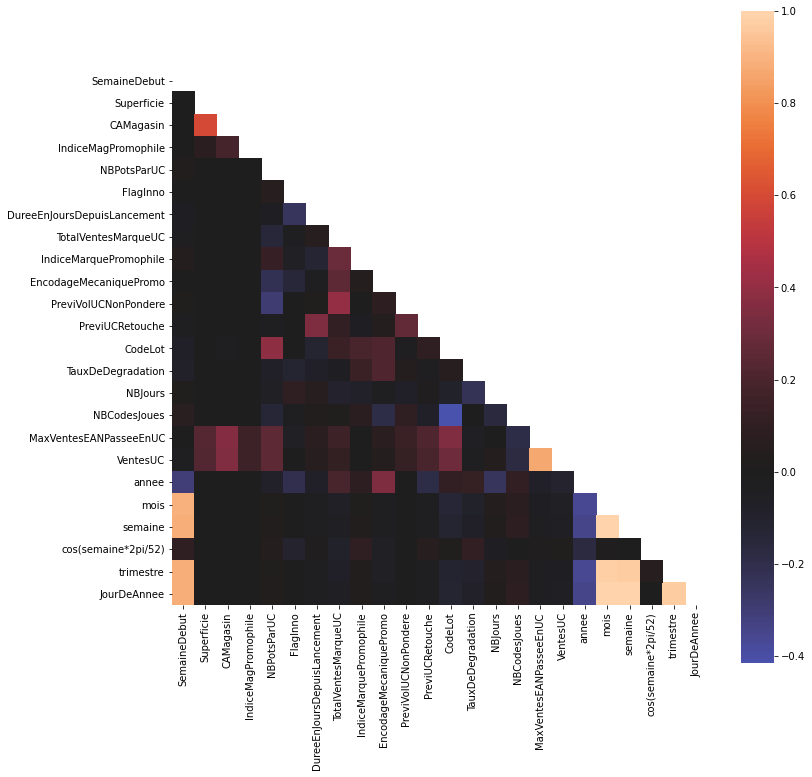

In [27]:
X_corr = df_clean.corr()
mask = np.zeros_like(X_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig = plt.figure(figsize = (12,12))

sns.heatmap(X_corr, center=0, square = True, mask = mask)

## Création du DataFrame encodée et transformé pour entrainement

In [28]:
df_transform = preprocessing.training_set_preprocessing.data_forward_transform(df_clean)

df_transform.describe(include = 'all').transpose()

Transforming skewed columns for Normal distribution approximation...


,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Confirmation,250345,1,Acceptée,250345,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Annee,250345,4,2019-01-01,85119,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SemaineDebut,250345,NaN,NaN,NaN,25.9246,14.5242,1,13,24,39,52
NomOpe,250345,188,MAI N° 4 - 2020,12097,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DateDebutConso,250345,169,2020-05-27,12097,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DateFinConso,250345,166,2020-06-02,12097,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Enseigne,250345,1,AUCHAN,250345,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DirectionRegionale,250345,3,2000,105784,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZoneCVR,250345,22,2100,33264,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SecteurCM,250345,59,CM 2120 / PM 2121,11015,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

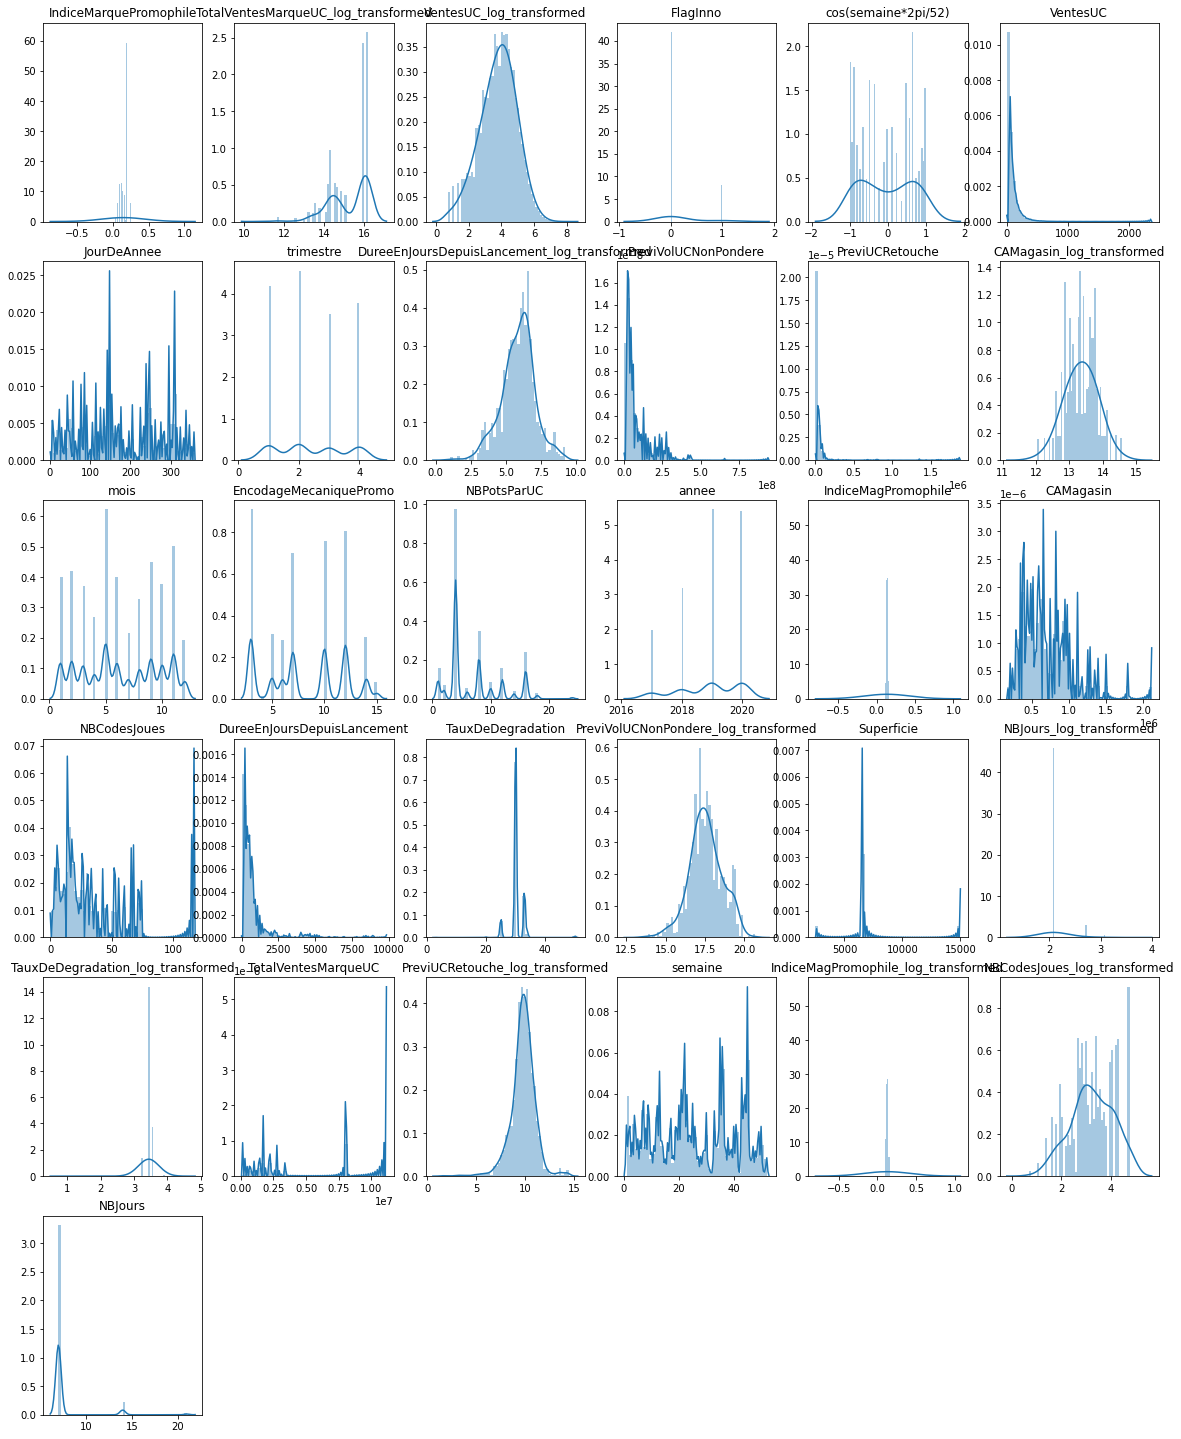

In [30]:
fig = plt.figure
fig(figsize =(20,30))
i=0
for col in set(df_transform.columns) - set(id_cols):
    plt.subplot(7, 6, i + 1)
    plt.title(col)
    sns.distplot(df_transform[[col]],  kde_kws={'bw':0.3})
    i+=1

plt.tight_layout

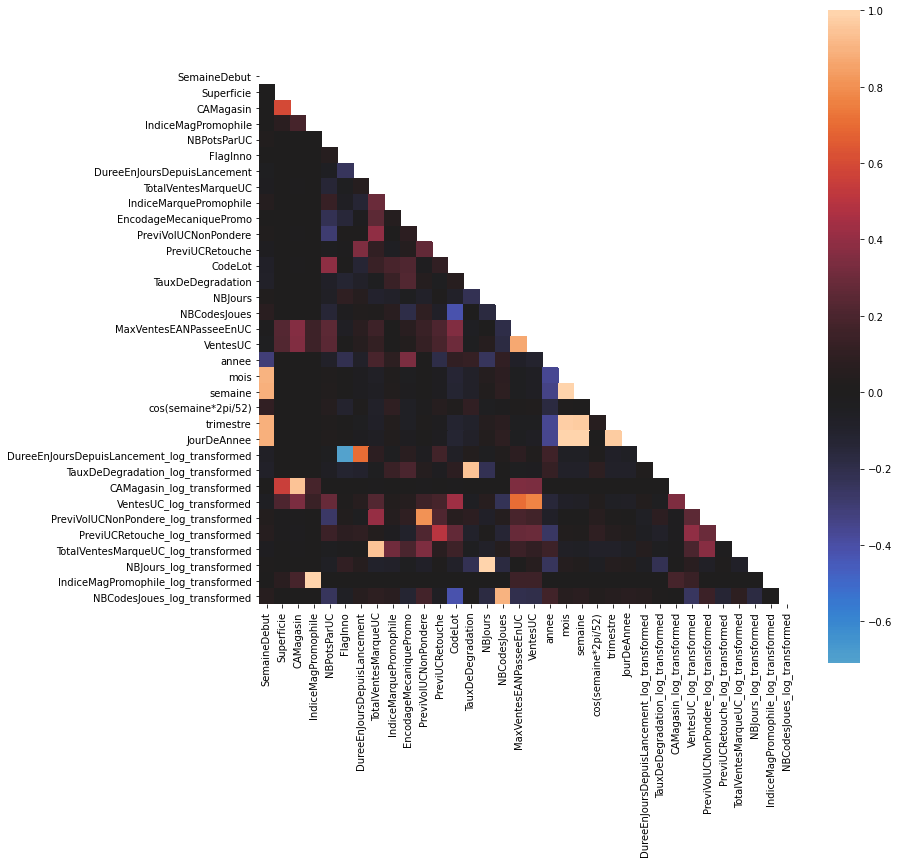

In [31]:
X_corr = df_transform.corr()
mask = np.zeros_like(X_corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

fig = plt.figure(figsize = (12,12))

sns.heatmap(X_corr, center=0, square = True, mask = mask)

## Encodage des données catégoriques

In [ ]:
df_encoded = preprocessing.training_set_preprocessing.feature_encoding(df_clean)

df_encoded.isna().sum()